In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy.stats import ttest_ind, ttest_1samp,pearsonr

In [10]:
df=sns.load_dataset('mpg')

1. Analyse de l'évolution deconsommation des voitures(mpg ) par rapport à la puissance du moteur (horsepower)



In [14]:
# Drop rows with missing values in 'horsepower' column
df = df.dropna(subset=['horsepower'])

# Calculate Pearson correlation
correlation, p_value = pearsonr(x=df['horsepower'], y=df['mpg'])
correlation, p_value


(-0.7784267838977761, 7.031989029403434e-81)

2) Peut-on affirmer avec un risque d'erreur de 2% que les voitures du Japon, d'Europe, et des États-Unis ont vu leur autonomie moyenne (mpg) augmenter entre la premiere moitiée des années 70s, et la seconde moitiée des années 70s ?

<Axes: xlabel='model_year', ylabel='mpg'>

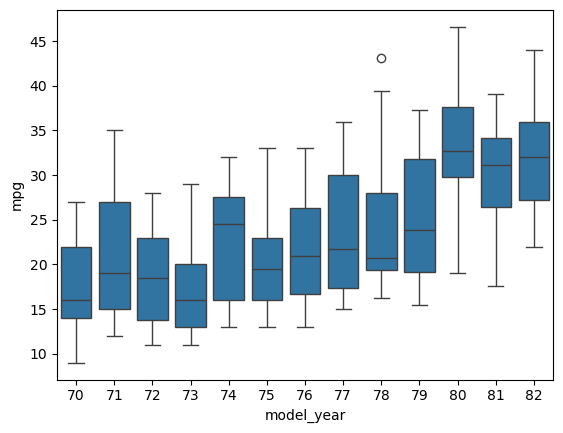

In [16]:
sns.boxplot(df,x='model_year',y='mpg')

In [21]:
df_temp =df.copy()
df_temp['half'] = df_temp["model_year"].apply(lambda x: x<75).replace({True:'early',False:'late'})

In [22]:
print(df_temp["half"])

0      early
1      early
2      early
3      early
4      early
       ...  
393     late
394     late
395     late
396     late
397     late
Name: half, Length: 392, dtype: object


In [23]:
df_temp = df_temp.query('`model_year` < =80')

<Axes: ylabel='mpg'>

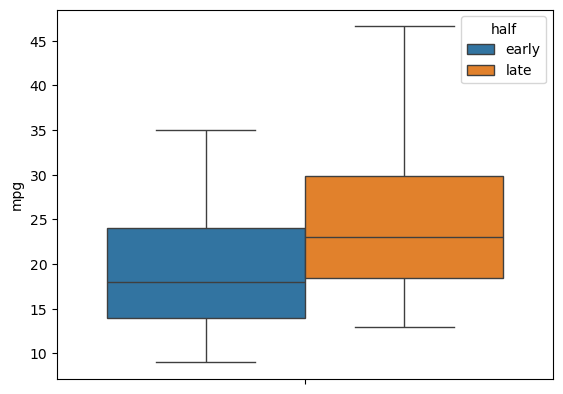

In [29]:
sns.boxplot(df_temp,y="mpg",hue='half')

Condition pour utiliser un ttest ind:
1.donnes normale ou pls de 30 obsevations
2 L'indéépendances des observations 
3. Variances similares entres les deux groupes

In [30]:
df_temp.groupby('half').size()

half
early    150
late     184
dtype: int64

Test de Student 2 échantillon indépendants